In [1]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

C:\Users\Napon\AppData\Local\Temp\ipykernel_26016\4107442835.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('fa_data_CSV8.csv')
df = df.dropna()
print(list(df.columns))


['Trans', 's11a', 's22a', 's33a', 's11m', 's22m', 's33m', 't12a', 't13a', 't23a', 't12m', 't13m', 't23m', 'fi11', 'fi22', 'fi33', 'fi12', 'fi13', 'fi23', 'Testing', 'mat', 'matgr', 'Rm', 'Re', 'f-1', 'f0', 'b-1', 'b0', 'rb-1', 't-1', 't0', 'Nx', 's11aW', 's22aW', 's33aW', 't12aW', 't13aW', 't23aW', 'gramW']


In [3]:
pdf = df[['s11a', 's22a', 's33a', 't12a', 't13a', 't23a', 's11m', 's22m', 's33m', 't12m', 't13m', 't23m', 'fi11', 'fi22', 'fi33', 'fi12', 'fi13', 'fi23', 'Rm', 'Re', 'f-1', 'f0', 't-1', 't0']]
print(pdf.shape)

pdf_ori = pdf[:295]
pdf_exp = pdf

ori_train_dataset = pdf_ori.sample(frac=0.95, random_state=7)
ori_test_dataset = pdf_ori.drop(ori_train_dataset.index)

exp_train_dataset = pdf_exp.sample(frac=0.95, random_state=7)
exp_test_dataset = pdf_exp.drop(exp_train_dataset.index)

print(ori_train_dataset.shape, ori_test_dataset.shape)
print(exp_train_dataset.shape, exp_test_dataset.shape)


test_dataset = pd.concat([ori_test_dataset, exp_test_dataset])

print(test_dataset.shape)

(1732, 24)
(280, 24) (15, 24)
(1645, 24) (87, 24)
(102, 24)


In [4]:
ori_train_x =  ori_train_dataset.copy()
ori_train_y = pd.DataFrame(ori_train_x.pop('f-1'), columns = ['f-1']) 

exp_train_x =  exp_train_dataset.copy()
exp_train_y = pd.DataFrame(exp_train_x.pop('f-1'), columns = ['f-1']) 

print(ori_train_x.shape, ori_train_y.shape)
print(exp_train_x.shape, exp_train_y.shape)

(280, 23) (280, 1)
(1645, 23) (1645, 1)


In [5]:
test_x =  test_dataset.copy()
test_y = pd.DataFrame(test_x.pop('f-1'), columns = ['f-1']) 

ori_test_x =  ori_test_dataset.copy()
ori_test_y = pd.DataFrame(ori_test_x.pop('f-1'), columns = ['f-1']) 

exp_test_x =  exp_test_dataset.copy()
exp_test_y = pd.DataFrame(exp_test_x.pop('f-1'), columns = ['f-1']) 


print(test_x.shape, test_y.shape)
print(ori_test_x.shape, ori_test_y.shape)
print(exp_test_x.shape, exp_test_y.shape)

(102, 23) (102, 1)
(15, 23) (15, 1)
(87, 23) (87, 1)


In [6]:
ori_train_x_tensor = torch.tensor(np.array(ori_train_x), dtype=torch.float32).to('cuda')
ori_train_y_tensor = torch.tensor(np.array(ori_train_y), dtype=torch.float32).to('cuda')

exp_train_x_tensor = torch.tensor(np.array(exp_train_x), dtype=torch.float32).to('cuda')
exp_train_y_tensor = torch.tensor(np.array(exp_train_y), dtype=torch.float32).to('cuda')

test_x_tensor = torch.tensor(np.array(test_x), dtype=torch.float32).to('cuda')
test_y_tensor = torch.tensor(np.array(test_y), dtype=torch.float32).to('cuda')

ori_test_x_tensor = torch.tensor(np.array(ori_test_x), dtype=torch.float32).to('cuda')
exp_test_x_tensor = torch.tensor(np.array(exp_test_x), dtype=torch.float32).to('cuda')


In [7]:
print(ori_train_x_tensor)

tensor([[  0.0000,   0.0000,   0.0000,  ..., 260.7518, 104.4778, 150.7900],
        [481.6416,   0.0000,   0.0000,  ..., 617.2125, 403.8404, 625.6108],
        [  0.0000,   0.0000,   0.0000,  ..., 832.0000, 303.0000, 532.0000],
        ...,
        [284.5433,   0.0000,   0.0000,  ..., 718.2548, 286.2256, 528.0072],
        [333.4532,   0.0000,   0.0000,  ..., 540.5233, 230.0213, 430.3182],
        [118.3133,   0.0000,   0.0000,  ..., 236.6266, 185.5630, 268.3333]],
       device='cuda:0')


network architecture

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()

        self.normalization = nn.BatchNorm1d(input_size)

        self.fc_layers = nn.Sequential(

            nn.Linear(input_size, 200),
            nn.ReLU(),

            nn.Linear(200, 200),
            nn.ReLU(),

            nn.Linear(200, 200),
            nn.ReLU(),

            nn.Linear(200, 200),
            nn.ReLU(),

            nn.Linear(200, 200),
            nn.ReLU(),

            nn.Linear(200, output_size)
        )
    
    def forward(self, x):

        out = self.normalization(x)
        out = self.fc_layers(out)

        return out

Training

Epoch [100/3000], Loss: 357.47
Epoch [200/3000], Loss: 93.33
Epoch [300/3000], Loss: 42.98
Epoch [400/3000], Loss: 29.25
Epoch [500/3000], Loss: 23.77
Epoch [600/3000], Loss: 19.39
Epoch [700/3000], Loss: 15.97
Epoch [800/3000], Loss: 13.47
Epoch [900/3000], Loss: 11.64
Epoch [1000/3000], Loss: 10.31
Epoch [1100/3000], Loss: 9.15
Epoch [1200/3000], Loss: 8.20
Epoch [1300/3000], Loss: 7.47
Epoch [1400/3000], Loss: 7.16
Epoch [1500/3000], Loss: 6.52
Epoch [1600/3000], Loss: 6.09
Epoch [1700/3000], Loss: 5.85
Epoch [1800/3000], Loss: 6.18
Epoch [1900/3000], Loss: 5.19
Epoch [2000/3000], Loss: 5.32
Epoch [2100/3000], Loss: 4.79
Epoch [2200/3000], Loss: 4.78
Epoch [2300/3000], Loss: 4.42
Epoch [2400/3000], Loss: 4.27
Epoch [2500/3000], Loss: 4.20
Epoch [2600/3000], Loss: 4.28
Epoch [2700/3000], Loss: 4.27
Epoch [2800/3000], Loss: 3.82
Epoch [2900/3000], Loss: 3.69
Epoch [3000/3000], Loss: 3.56
           Y_pred         f-1    error(%)
count  280.000000  280.000000  280.000000
mean   388.938

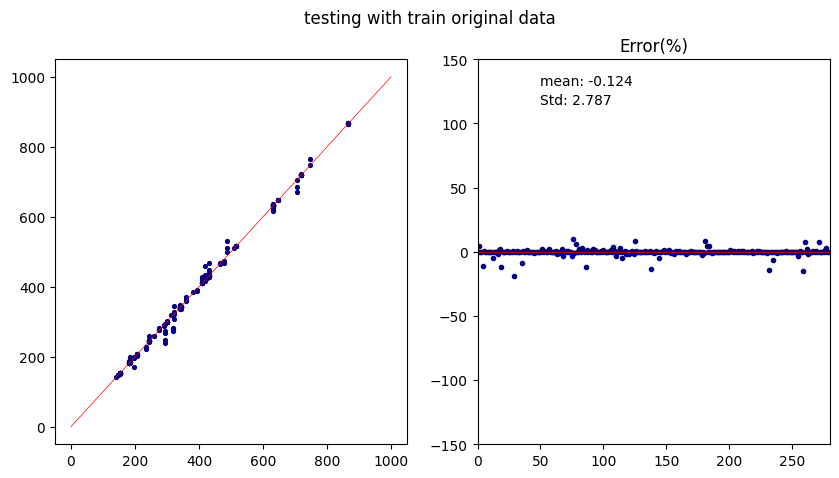

In [9]:
torch.manual_seed(777)
ori_model = NeuralNetwork(23, 1).to('cuda')
Lossfunc = nn.L1Loss()
optimizer = torch.optim.Adam(ori_model.parameters(), lr=0.0001)
epochs = 3000
for epoch in range(epochs):

    ori_model.train()
    optimizer.zero_grad()
    outputs = ori_model(ori_train_x_tensor)
    loss = Lossfunc(outputs, ori_train_y_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.2f}')

with torch.no_grad():
    output = ori_model(ori_train_x_tensor)
    output = output.to('cpu')  
    
Y_pred = output.detach().numpy()

prediction_ori = pd.DataFrame(Y_pred, columns = ['Y_pred'])
prediction_ori['f-1'] = np.array(ori_train_y)
prediction_ori['error(%)'] = ((prediction_ori['Y_pred']-prediction_ori['f-1'])/prediction_ori['f-1'])*100

fig_ori, axs = plt.subplots(1, 2, figsize=(10, 5))
fig_ori.suptitle('testing with train original data')
axs[0].scatter(prediction_ori['f-1'], prediction_ori['Y_pred'], s=30 , marker='.', color='navy')
axs[0].plot([1000,0],[1000,0],'-',color='red', linewidth=0.5)

axs[1].plot(prediction_ori['error(%)'] ,'.', color='navy')
axs[1].plot([0,780],[0,0],'-',color='red', linewidth=0.5)
axs[1].set_xlim([0, ori_train_y.shape[0]])
axs[1].set_ylim([-150, 150])
axs[1].set_title("Error(%)")
axs[1].text(50,130,f"mean: {prediction_ori['error(%)'].mean():.3f}",fontsize=10)
axs[1].text(50,115,f"Std: {prediction_ori['error(%)'].std():.3f}",fontsize=10)

print(prediction_ori.describe())

Epoch [100/3000], Loss: 343.71
Epoch [200/3000], Loss: 84.06
Epoch [300/3000], Loss: 50.62
Epoch [400/3000], Loss: 36.43
Epoch [500/3000], Loss: 30.01
Epoch [600/3000], Loss: 25.50
Epoch [700/3000], Loss: 21.82
Epoch [800/3000], Loss: 18.98
Epoch [900/3000], Loss: 16.65
Epoch [1000/3000], Loss: 14.76
Epoch [1100/3000], Loss: 13.21
Epoch [1200/3000], Loss: 12.01
Epoch [1300/3000], Loss: 11.11
Epoch [1400/3000], Loss: 10.35
Epoch [1500/3000], Loss: 9.57
Epoch [1600/3000], Loss: 9.07
Epoch [1700/3000], Loss: 8.67
Epoch [1800/3000], Loss: 8.45
Epoch [1900/3000], Loss: 8.17
Epoch [2000/3000], Loss: 7.86
Epoch [2100/3000], Loss: 7.64
Epoch [2200/3000], Loss: 7.74
Epoch [2300/3000], Loss: 7.20
Epoch [2400/3000], Loss: 7.04
Epoch [2500/3000], Loss: 6.88
Epoch [2600/3000], Loss: 7.12
Epoch [2700/3000], Loss: 6.69
Epoch [2800/3000], Loss: 6.53
Epoch [2900/3000], Loss: 6.95
Epoch [3000/3000], Loss: 6.44
            Y_pred          f-1     error(%)
count  1645.000000  1645.000000  1645.000000
mean

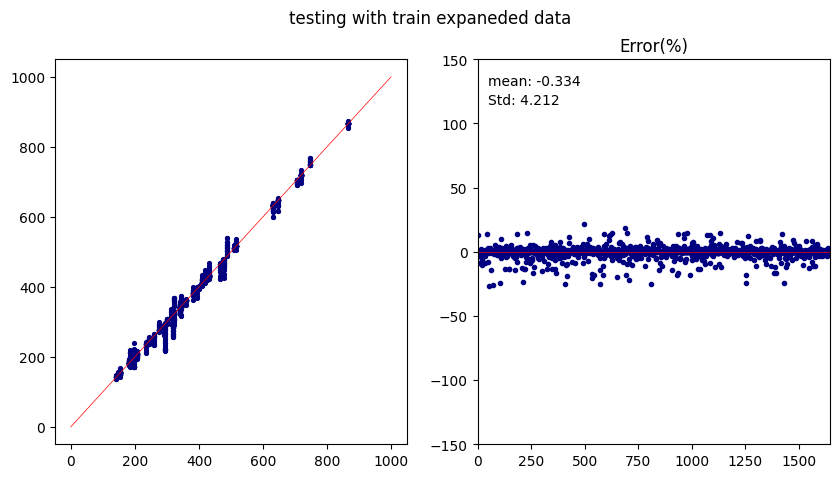

In [10]:
torch.manual_seed(777)
exp_model = NeuralNetwork(23, 1).to('cuda')
Lossfunc = nn.L1Loss()
optimizer = torch.optim.Adam(exp_model.parameters(), lr=0.0001)
epochs = 3000
for epoch in range(epochs):

    exp_model.train()
    optimizer.zero_grad()
    outputs = exp_model(exp_train_x_tensor)
    loss = Lossfunc(outputs, exp_train_y_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.2f}')

with torch.no_grad():
    output = exp_model(exp_train_x_tensor)
    output = output.to('cpu')  
    
Y_pred = output.detach().numpy()

prediction_exp = pd.DataFrame(Y_pred, columns = ['Y_pred'])
prediction_exp['f-1'] = np.array(exp_train_y)
prediction_exp['error(%)'] = ((prediction_exp['Y_pred']-prediction_exp['f-1'])/prediction_exp['f-1'])*100

fig_exp, axs = plt.subplots(1, 2, figsize=(10, 5))
fig_exp.suptitle('testing with train expaneded data')
axs[0].scatter(prediction_exp['f-1'], prediction_exp['Y_pred'], s=30 , marker='.', color='navy')
axs[0].plot([1000,0],[1000,0],'-',color='red', linewidth=0.5)

axs[1].plot(prediction_exp['error(%)'] ,'.', color='navy')
axs[1].plot([0,exp_train_y.shape[0]],[0,0],'-',color='red', linewidth=0.5)
axs[1].set_xlim([0, exp_train_y.shape[0]])
axs[1].set_ylim([-150, 150])
axs[1].set_title("Error(%)")
axs[1].text(50,130,f"mean: {prediction_exp['error(%)'].mean():.3f}",fontsize=10)
axs[1].text(50,115,f"Std: {prediction_exp['error(%)'].std():.3f}",fontsize=10)

print(prediction_exp.describe())

In [11]:
ori_model.eval()
exp_model.eval()
with torch.no_grad():
    ori_outputs = ori_model(test_x_tensor)
    exp_outputs = exp_model(test_x_tensor)

    ori_outputs_oritest = ori_model(ori_test_x_tensor)
    exp_outputs_exptest = exp_model(exp_test_x_tensor)

    ori_outputs_exptest = ori_model(exp_test_x_tensor)
    exp_outputs_oritest = exp_model(ori_test_x_tensor)
    
    ori_outputs = ori_outputs.to('cpu')  
    exp_outputs = exp_outputs.to('cpu')  
    ori_outputs_exptest = ori_outputs_exptest.to('cpu') 
    exp_outputs_oritest = exp_outputs_oritest.to('cpu') 
    ori_outputs_oritest = ori_outputs_oritest.to('cpu') 
    exp_outputs_exptest = exp_outputs_exptest.to('cpu') 



ori_pred = ori_outputs.detach().numpy()
exp_pred = exp_outputs.detach().numpy()

ori_pred_ori = ori_outputs_oritest.detach().numpy()
exp_pred_exp = exp_outputs_exptest.detach().numpy()
ori_pred_exp = ori_outputs_exptest.detach().numpy()
exp_pred_ori = exp_outputs_oritest.detach().numpy()

prediction = pd.DataFrame(ori_pred, columns = ['ori_pred'])
prediction['exp_pred'] = np.array(exp_pred)


prediction['f-1'] = np.array(test_y)
prediction['ori_error(%)'] = (((prediction['ori_pred'] - prediction['f-1'])/prediction['f-1'])*100)
prediction['exp_error(%)'] = (((prediction['exp_pred'] - prediction['f-1'])/prediction['f-1'])*100)



prediction = pd.concat([prediction, test_x.reset_index()], axis=1)

print(prediction.describe())

#print(prediction[:100])

#prediction.to_csv('prediction.csv', index=False)

           ori_pred    exp_pred         f-1  ori_error(%)  exp_error(%)  \
count  1.020000e+02  102.000000  102.000000  1.020000e+02    102.000000   
mean   5.235022e+05  374.629028  376.846688  1.804709e+05     -0.431036   
std    1.888527e+06  174.302109  175.575724  6.359666e+05      4.256072   
min    1.347007e+02  145.417084  141.461202 -3.371895e+01    -17.861898   
25%    3.024195e+02  242.931435  244.506937 -4.591274e+00     -1.479115   
50%    4.620136e+02  362.177750  361.000000  3.034876e+00      0.066248   
75%    8.163783e+04  436.867554  457.002577  2.608287e+04      1.625968   
max    1.335269e+07  868.105835  866.000000  3.892814e+06     13.735603   

             index        s11a        s22a        s33a        t12a  ...  \
count   102.000000  102.000000  102.000000  102.000000  102.000000  ...   
mean    818.392157  108.776701   67.997482   28.705293   19.396289  ...   
std     515.059088  153.306564  135.550732   91.709722  133.372170  ...   
min       0.000000   -0.

In [12]:
prediction_1 = pd.DataFrame(ori_pred_ori, columns = ['ori_pred_ori'])
prediction_1['exp_pred_ori'] = np.array(exp_pred_ori)
prediction_1['f-1'] = np.array(ori_test_y)
prediction_1['ori_oritest_error(%)'] = ((abs(prediction_1['ori_pred_ori'] - prediction_1['f-1'])/prediction_1['f-1'])*100)
prediction_1['exp_oritest_error(%)'] = ((abs(prediction_1['exp_pred_ori'] - prediction_1['f-1'])/prediction_1['f-1'])*100)


prediction_2 = pd.DataFrame(ori_pred_exp, columns = ['ori_pred_exp'])
prediction_2['exp_pred_exp'] = np.array(exp_pred_exp)
prediction_2['f-1'] = np.array(exp_test_y)
prediction_2['ori_exptest_error(%)'] = ((abs(prediction_2['ori_pred_exp'] - prediction_2['f-1'])/prediction_2['f-1'])*100)
prediction_2['exp_exptest_error(%)'] = ((abs(prediction_2['exp_pred_exp'] - prediction_2['f-1'])/prediction_2['f-1'])*100)

Text(-30, 0.75, '+-10% : 94.12 96/102')

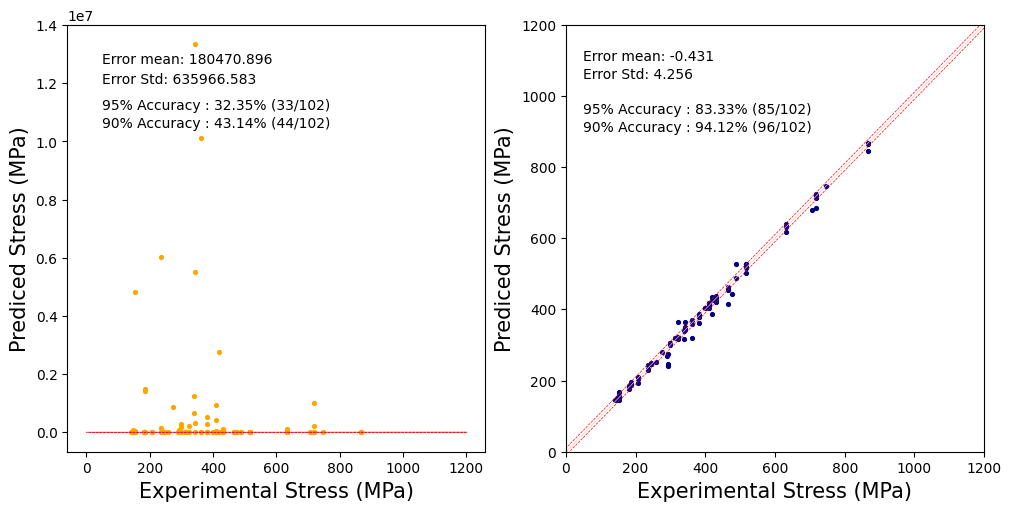

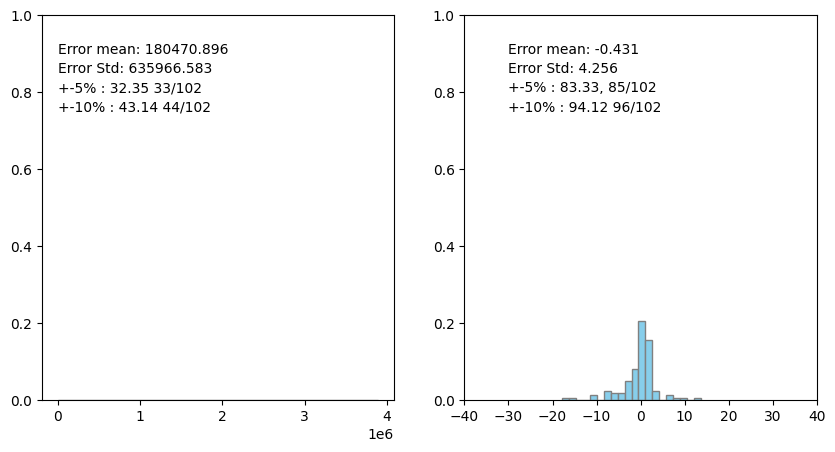

In [13]:
ori_Temp_error = prediction['ori_error(%)']
ori_filtered_data5 = ori_Temp_error[(ori_Temp_error >= -5) & (ori_Temp_error <= 5)]
ori_filtered_data10 = ori_Temp_error[(ori_Temp_error >= -10) & (ori_Temp_error <= 10)]

exp_Temp_error = prediction['exp_error(%)']
exp_filtered_data5 = exp_Temp_error[(exp_Temp_error >= -5) & (exp_Temp_error <= 5)]
exp_filtered_data10 = exp_Temp_error[(exp_Temp_error >= -10) & (exp_Temp_error <= 10)]


fig_1, axs = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
#fig_1.suptitle('Testing with test dataset')
axs[0].scatter(prediction['f-1'], prediction['ori_pred'], s=30 , marker='.', color='orange',label = "Sines")
axs[0].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
#axs[0].set_xlim([0, 1200])
#axs[0].set_ylim([0, 1200])
axs[0].text(50,1.27e7,f"Error mean: {prediction['ori_error(%)'].mean():.3f}",fontsize=10)
axs[0].text(50,1.20e7,f"Error Std: {prediction['ori_error(%)'].std():.3f}",fontsize=10)
#axs[0].set_title("ori_model_test")
axs[0].set_xlabel('Experimental Stress (MPa)', size=15)
axs[0].set_ylabel('Prediced Stress (MPa)', size=15)

axs[0].text(50,1.11e7,f"95% Accuracy : {ori_filtered_data5.count()/test_x.shape[0]*100:.2f}% ({ori_filtered_data5.count()}/{test_x.shape[0]})",fontsize=10)
axs[0].text(50,1.05e7,f"90% Accuracy : {ori_filtered_data10.count()/test_x.shape[0]*100:.2f}% ({ori_filtered_data10.count()}/{test_x.shape[0]})",fontsize=10)

axs[0].plot([1200,0],[1200,0],'-',color='pink', linewidth=0.5)
axs[0].plot([1200,0],[1210,10],'--',color='red', linewidth=0.5)
axs[0].plot([1200,10],[1190,0],'--',color='red', linewidth=0.5)



axs[1].scatter(prediction['f-1'], prediction['exp_pred'], s=30 , marker='.', color='navy',label = "Sines")
#axs[1].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
axs[1].set_xlim([0, 1200])
axs[1].set_ylim([0, 1200])
axs[1].text(50,1100,f"Error mean: {prediction['exp_error(%)'].mean():.3f}",fontsize=10)
axs[1].text(50,1050,f"Error Std: {prediction['exp_error(%)'].std():.3f}",fontsize=10)
#axs[1].set_title("exp_model_test")
axs[1].set_xlabel('Experimental Stress (MPa)', size=15)
axs[1].set_ylabel('Prediced Stress (MPa)', size=15)

axs[1].text(50,950,f"95% Accuracy : {exp_filtered_data5.count()/test_x.shape[0]*100:.2f}% ({exp_filtered_data5.count()}/{test_x.shape[0]})",fontsize=10)
axs[1].text(50,900,f"90% Accuracy : {exp_filtered_data10.count()/test_x.shape[0]*100:.2f}% ({exp_filtered_data10.count()}/{test_x.shape[0]})",fontsize=10)

axs[1].plot([1200,0],[1200,0],'-',color='pink', linewidth=0.5)
axs[1].plot([1200,0],[1210,10],'--',color='red', linewidth=0.5)
axs[1].plot([1200,10],[1190,0],'--',color='red', linewidth=0.5)




fig_1_1, axs = plt.subplots(1, 2, figsize=(10, 5))
#fig_1.suptitle('Normal plot')
axs[0].hist(prediction['ori_error(%)'], bins=20, color='skyblue', edgecolor='gray',density=True)
#axs[0].set_xlim([-40, 40])
axs[0].set_ylim([0, 1])
axs[0].text(-30,0.9,f"Error mean: {prediction['ori_error(%)'].mean():.3f}",fontsize=10)
axs[0].text(-30,0.85,f"Error Std: {prediction['ori_error(%)'].std():.3f}",fontsize=10)
axs[0].text(-30,0.8,f"+-5% : {ori_filtered_data5.count()/test_x.shape[0]*100:.2f} {ori_filtered_data5.count()}/{test_x.shape[0]}",fontsize=10)
axs[0].text(-30,0.75,f"+-10% : {ori_filtered_data10.count()/test_x.shape[0]*100:.2f} {ori_filtered_data10.count()}/{test_x.shape[0]}",fontsize=10)


axs[1].hist(prediction['exp_error(%)'], bins=20, color='skyblue', edgecolor='gray',density=True)
axs[1].set_xlim([-40, 40])
axs[1].set_ylim([0, 1])
axs[1].text(-30,0.9,f"Error mean: {prediction['exp_error(%)'].mean():.3f}",fontsize=10)
axs[1].text(-30,0.85,f"Error Std: {prediction['exp_error(%)'].std():.3f}",fontsize=10)
axs[1].text(-30,0.8,f"+-5% : {exp_filtered_data5.count()/test_x.shape[0]*100:.2f}, {exp_filtered_data5.count()}/{test_x.shape[0]}",fontsize=10)
axs[1].text(-30,0.75,f"+-10% : {exp_filtered_data10.count()/test_x.shape[0]*100:.2f} {exp_filtered_data10.count()}/{test_x.shape[0]}",fontsize=10)

Text(50, 1050, 'Std: 2.348')

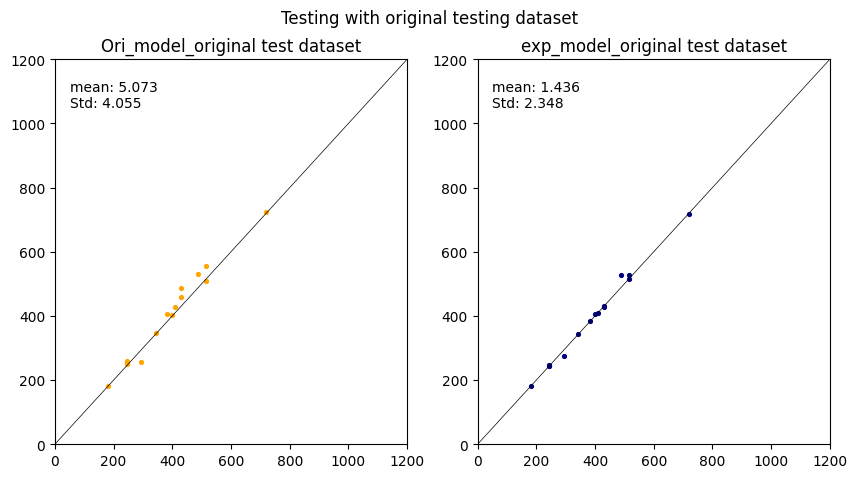

In [14]:
fig_2, axs = plt.subplots(1, 2, figsize=(10, 5))
fig_2.suptitle('Testing with original testing dataset')
axs[0].set_title("Ori_model_original test dataset")
axs[0].scatter(prediction_1['f-1'], prediction_1['ori_pred_ori'], s=30 , marker='.', color='orange',label = "Sines")
axs[0].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
axs[0].set_xlim([0, 1200])
axs[0].set_ylim([0, 1200])
axs[0].text(50,1100,f"mean: {prediction_1['ori_oritest_error(%)'].mean():.3f}",fontsize=10)
axs[0].text(50,1050,f"Std: {prediction_1['ori_oritest_error(%)'].std():.3f}",fontsize=10)


axs[1].set_title("exp_model_original test dataset")
axs[1].scatter(prediction_1['f-1'], prediction_1['exp_pred_ori'], s=30 , marker='.', color='navy',label = "Sines")
axs[1].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
axs[1].set_xlim([0, 1200])
axs[1].set_ylim([0, 1200])
axs[1].text(50,1100,f"mean: {prediction_1['exp_oritest_error(%)'].mean():.3f}",fontsize=10)
axs[1].text(50,1050,f"Std: {prediction_1['exp_oritest_error(%)'].std():.3f}",fontsize=10)


Text(50, 1050, 'Std: 3.492')

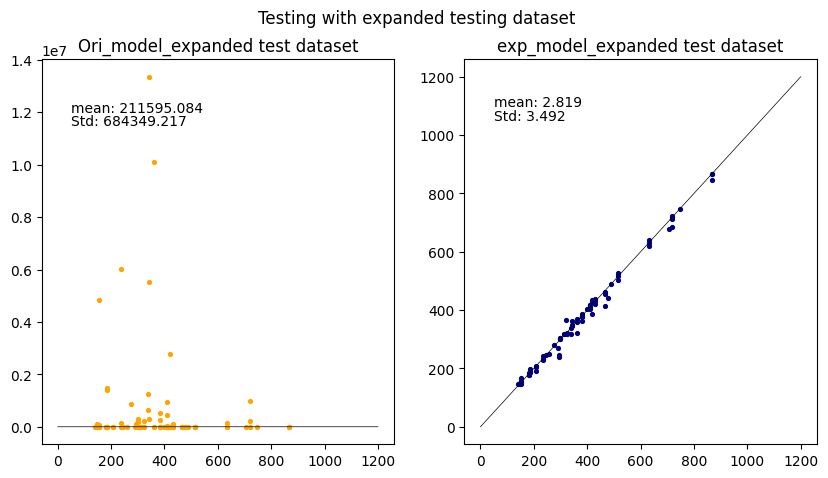

In [15]:
fig_3, axs = plt.subplots(1, 2, figsize=(10, 5))
fig_3.suptitle('Testing with expanded testing dataset')
axs[0].set_title("Ori_model_expanded test dataset")
axs[0].scatter(prediction_2['f-1'], prediction_2['ori_pred_exp'], s=30 , marker='.', color='orange',label = "Sines")
axs[0].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
#axs[0].set_xlim([0, 1200])
#axs[0].set_ylim([0, 1200])
axs[0].text(50,1.2e7,f"mean: {prediction_2['ori_exptest_error(%)'].mean():.3f}",fontsize=10)
axs[0].text(50,1.15e7,f"Std: {prediction_2['ori_exptest_error(%)'].std():.3f}",fontsize=10)

axs[1].set_title("exp_model_expanded test dataset")
axs[1].scatter(prediction_2['f-1'], prediction_2['exp_pred_exp'], s=30 , marker='.', color='navy',label = "Sines")
axs[1].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
#axs[1].set_xlim([0, 1200])
#axs[1].set_ylim([0, 1200])
axs[1].text(50,1100,f"mean: {prediction_2['exp_exptest_error(%)'].mean():.3f}",fontsize=10)
axs[1].text(50,1050,f"Std: {prediction_2['exp_exptest_error(%)'].std():.3f}",fontsize=10)

Text(50, 900, '90% Accuracy : 92.16% (47/51)')

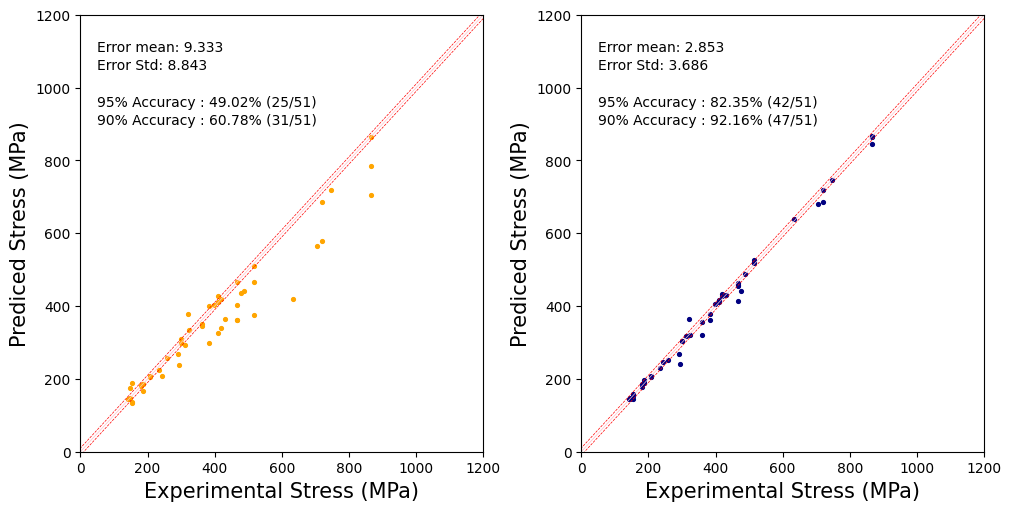

In [17]:
exp_test_x_ed =  exp_test_dataset.drop([312,345,356,366,391,400,402,481,494,502,535,537,554,579,604,730,741,745,759,763,764,772,787,803,823,1043,1154,1310,1372,1373,1398,1415,1422,1439,1661,1709])
exp_test_y_ed = pd.DataFrame(exp_test_x_ed.pop('f-1'), columns = ['f-1']) 

exp_ed_train_x_tensor = torch.tensor(np.array(exp_test_x_ed), dtype=torch.float32).to('cuda')

with torch.no_grad():
    ori_outputs = ori_model(exp_ed_train_x_tensor)
    exp_outputs = exp_model(exp_ed_train_x_tensor)
    ori_outputs = ori_outputs.to('cpu')  
    exp_outputs = exp_outputs.to('cpu')  

ori_pred = ori_outputs.detach().numpy()
exp_pred = exp_outputs.detach().numpy()

prediction_3 = pd.DataFrame(ori_pred, columns = ['ori_pred_exp_ed'])
prediction_3['exp_pred_exp_ed'] = np.array(exp_pred)
prediction_3['f-1'] = np.array(exp_test_y_ed)
prediction_3['ori_error(%)'] = ((abs(prediction_3['ori_pred_exp_ed'] - prediction_3['f-1'])/prediction_3['f-1'])*100)
prediction_3['exp__error(%)'] = ((abs(prediction_3['exp_pred_exp_ed'] - prediction_3['f-1'])/prediction_3['f-1'])*100)

ori_Temp_error_1 = prediction_3['ori_error(%)']
ori_filtered_data5_1 = ori_Temp_error_1[(ori_Temp_error_1 >= -5) & (ori_Temp_error_1 <= 5)]
ori_filtered_data10_1 = ori_Temp_error_1[(ori_Temp_error_1 >= -10) & (ori_Temp_error_1 <= 10)]

exp_Temp_error_1 = prediction_3['exp__error(%)']
exp_filtered_data5_1 = exp_Temp_error_1[(exp_Temp_error_1 >= -5) & (exp_Temp_error_1 <= 5)]
exp_filtered_data10_1 = exp_Temp_error_1[(exp_Temp_error_1 >= -10) & (exp_Temp_error_1 <= 10)]


fig_4, axs = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
#fig_4.suptitle('Testing with expanded testing dataset(edited)')
#axs[0].set_title("Ori_model_expanded dataset")
axs[0].scatter(prediction_3['f-1'], prediction_3['ori_pred_exp_ed'], s=30 , marker='.', color='orange',label = "Sines")
#axs[0].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
axs[0].set_xlim([0, 1200])
axs[0].set_ylim([0, 1200])
axs[0].text(50,1100,f"Error mean: {prediction_3['ori_error(%)'].mean():.3f}",fontsize=10)
axs[0].text(50,1050,f"Error Std: {prediction_3['ori_error(%)'].std():.3f}",fontsize=10)
axs[0].set_xlabel('Experimental Stress (MPa)', size=15)
axs[0].set_ylabel('Prediced Stress (MPa)', size=15)

axs[0].plot([1200,0],[1200,0],'-',color='pink', linewidth=0.5)
axs[0].plot([1200,0],[1210,10],'--',color='red', linewidth=0.5)
axs[0].plot([1200,10],[1190,0],'--',color='red', linewidth=0.5)

#axs[0].text(50,950, '90% Accuracy: 33/102, (32.35%)',fontsize=10)
#axs[0].text(50,900, '95% Accuracy: 44/102, (43.14%)',fontsize=10)

axs[0].text(50,950,f"95% Accuracy : {ori_filtered_data5_1.count()/exp_test_x_ed.shape[0]*100:.2f}% ({ori_filtered_data5_1.count()}/{exp_test_x_ed.shape[0]})",fontsize=10)
axs[0].text(50,900,f"90% Accuracy : {ori_filtered_data10_1.count()/exp_test_x_ed.shape[0]*100:.2f}% ({ori_filtered_data10_1.count()}/{exp_test_x_ed.shape[0]})",fontsize=10)


#axs[1].set_title("exp_model_expanded dataset")
axs[1].scatter(prediction_3['f-1'], prediction_3['exp_pred_exp_ed'], s=30 , marker='.', color='navy',label = "Sines")
#axs[1].plot([0,1200],[0,1200],'-',color='black', linewidth=0.5)
axs[1].set_xlim([0, 1200])
axs[1].set_ylim([0, 1200])
axs[1].text(50,1100,f"Error mean: {prediction_3['exp__error(%)'].mean():.3f}",fontsize=10)
axs[1].text(50,1050,f"Error Std: {prediction_3['exp__error(%)'].std():.3f}",fontsize=10)
axs[1].set_xlabel('Experimental Stress (MPa)', size=15)
axs[1].set_ylabel('Prediced Stress (MPa)', size=15)

axs[1].plot([1200,0],[1200,0],'-',color='pink', linewidth=0.5)
axs[1].plot([1200,0],[1210,10],'--',color='red', linewidth=0.5)
axs[1].plot([1200,10],[1190,0],'--',color='red', linewidth=0.5)

#axs[1].text(50,950, '90% Accuracy: 85/102, (83,33%)',fontsize=10)
#axs[1].text(50,900, '95% Accuracy: 96/102, (94,12%)',fontsize=10)

axs[1].text(50,950,f"95% Accuracy : {exp_filtered_data5_1.count()/exp_test_x_ed.shape[0]*100:.2f}% ({exp_filtered_data5_1.count()}/{exp_test_x_ed.shape[0]})",fontsize=10)
axs[1].text(50,900,f"90% Accuracy : {exp_filtered_data10_1.count()/exp_test_x_ed.shape[0]*100:.2f}% ({exp_filtered_data10_1.count()}/{exp_test_x_ed.shape[0]})",fontsize=10)
